<a href="https://colab.research.google.com/github/agnestsiburian/Proyek-CERTAN-NaiveBayes-G2/blob/main/Proyek_CERTAN_NaiveBayes_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Pengembangan Model untuk Mengklasifikasi Malware Menggunakan Algoritma Naive Bayes</center>

## Catatan Kerja Praktikum

<table align="left" style="font-family: sans-serif; font-size: 14px;">
    <tr>
        <td style="text-align:left">Kode Mata Kuliah</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left">10S3001</td>
    </tr>
    <tr>
        <td style="text-align:left">Nama Mata Kuliah</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left">Kecerdasan Buatan</td>
    </tr>
    <tr>
        <td style="text-align:left">Topik</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left"><i>Naive Bayes dalam Klasifikasi Malware</i></td>
    </tr>
    <tr>
        <td style="text-align:left">Kelompok</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left"><i>02</i></td>
    </tr>
    <tr>
        <td style="text-align:left">Anggota Kelompok</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left" colspan="3">
            <i> 12S21040 Christina Putri Hutahaean </i><br>
            <i> 12S21057 Agnes Theresia Siburian </i><br>
            <i> 12S21059 Tio Manalu </i><br>
            <i> 12S21060 Glory Natasya Hutahaean </i>
        </td>
    </tr>
</table>

## Implementasi

First, import all the required libraries, including pandas for data manipulation, numpy for numerical operations, and scikit-learn for machine learning tasks. Matplotlib and seaborn are used for data visualization, and specific modules like LabelEncoder, StandardScaler, and GaussianNB are imported for preprocessing, model evaluation, and classification.

In [ ]:
# Import libraries

# Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# Scikit-learn Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score

Now, we will read the CSV file as our dataset *android_traffic.csv'* using **pandas**, displaying the first few rows to provide an initial overview of the data.

In [ ]:
# Read dataset
df = pd.read_csv('/content/sample_data/android_traffic.csv', sep=';')
df.head()

,name,tcp_packets,dist_port_tcp,external_ips,volume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,duracion,avg_local_pkt_rate,avg_remote_pkt_rate,source_app_packets.1,dns_query_times,type
0,AntiVirus,36,6,3,3911,0,0,39,33,5100,4140,NaN,NaN,NaN,39,3,benign
1,AntiVirus,117,0,9,23514,0,0,128,107,26248,24358,NaN,NaN,NaN,128,11,benign
2,AntiVirus,196,0,6,24151,0,0,205,214,163887,24867,NaN,NaN,NaN,205,9,benign
3,AntiVirus,6,0,1,889,0,0,7,6,819,975,NaN,NaN,NaN,7,1,benign
4,AntiVirus,6,0,1,882,0,0,7,6,819,968,NaN,NaN,NaN,7,1,benign


**df.info()** provides information about the dataset, including the data types of each column, the number of non-null values, and memory usage. Meanwhile, **df.shape** returns a tuple representing the dimensions of the DataFrame, i.e., the number of rows and columns.

In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  7845 non-null   object 
 1   tcp_packets           7845 non-null   int64  
 2   dist_port_tcp         7845 non-null   int64  
 3   external_ips          7845 non-null   int64  
 4   volume_bytes          7845 non-null   int64  
 5   udp_packets           7845 non-null   int64  
 6   tcp_urg_packet        7845 non-null   int64  
 7   source_app_packets    7845 non-null   int64  
 8   remote_app_packets    7845 non-null   int64  
 9   source_app_bytes      7845 non-null   int64  
 10  remote_app_bytes      7845 non-null   int64  
 11  duracion              0 non-null      float64
 12  avg_local_pkt_rate    0 non-null      float64
 13  avg_remote_pkt_rate   0 non-null      float64
 14  source_app_packets.1  7845 non-null   int64  
 15  dns_query_times      

(7845, 17)

These two commands are often used together to get an overview of the dataset's structure and size.

Then, we drops unnecessary columns from the DataFrame using **df.drop** and then displays the first few rows of the modified DataFrame using **df.head()**.

In [ ]:
# Drop unnecessary columns
df.drop(columns=['duracion', 'avg_local_pkt_rate', 'avg_remote_pkt_rate'], inplace=True)
df.head()

,name,tcp_packets,dist_port_tcp,external_ips,volume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,source_app_packets.1,dns_query_times,type
0,AntiVirus,36,6,3,3911,0,0,39,33,5100,4140,39,3,benign
1,AntiVirus,117,0,9,23514,0,0,128,107,26248,24358,128,11,benign
2,AntiVirus,196,0,6,24151,0,0,205,214,163887,24867,205,9,benign
3,AntiVirus,6,0,1,889,0,0,7,6,819,975,7,1,benign
4,AntiVirus,6,0,1,882,0,0,7,6,819,968,7,1,benign


**df.describe()** calculates descriptive statistics of the numerical columns in the DataFrame.

In [ ]:
# Describe data
df.describe()

,tcp_packets,dist_port_tcp,external_ips,volume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,source_app_packets.1,dns_query_times
count,7845.000000,7845.000000,7845.000000,7.845000e+03,7845.000000,7845.000000,7845.000000,7845.000000,7.845000e+03,7.845000e+03,7845.000000,7845.000000
mean,147.578713,7.738177,2.748502,1.654375e+04,0.056724,0.000255,152.911918,194.706310,2.024967e+05,1.692260e+04,152.911918,4.898917
std,777.920084,51.654222,2.923005,8.225650e+04,1.394046,0.015966,779.034618,1068.112696,1.401076e+06,8.238182e+04,779.034618,18.900478
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000e+00,6.900000e+01,1.000000,0.000000
25%,6.000000,0.000000,1.000000,8.880000e+02,0.000000,0.000000,7.000000,7.000000,9.340000e+02,1.046000e+03,7.000000,1.000000
50%,25.000000,0.000000,2.000000,3.509000e+03,0.000000,0.000000,30.000000,24.000000,4.090000e+03,3.803000e+03,30.000000,3.000000
75%,93.000000,0.000000,4.000000,1.218900e+04,0.000000,0.000000,98.000000,92.000000,2.624400e+04,1.261000e+04,98.000000,5.000000
max,37143.000000,2167.000000,43.000000,4.226790e+06,65.000000,1.000000,37150.000000,45928.000000,6.823516e+07,4.227323e+06,37150.000000,913.000000


In [ ]:
# Encode categorical variable 'name'
df_encoded = pd.get_dummies(df, columns=['name'], drop_first=True)

The data is split into independent ('X') and dependent ('y') variables preparing it for the *training and testing* phases. It utilizes the **train_test_split** function from scikit-learn.

In [ ]:
# Split data into dependent/independent variables
X = df_encoded.drop(columns=['type']).values  # Independent variables
y = df_encoded['type'].values  # Dependent variable

In [ ]:
# Split data into test/train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

The scale dataset is standardized by scaling its features using **StandardScaler()** from scikit-learn to ensure uniformity and improved model performance.

In [ ]:
 # Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Then, we creates a Naive Bayes classifier and fits it to the training data.

In [ ]:
# Classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

Next, we prints the predicted values alongside the actual values.

In [ ]:
# Prediction
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[['malicious' 'malicious']
 ['malicious' 'malicious']
 ['benign' 'benign']
 ...
 ['malicious' 'malicious']
 ['benign' 'benign']
 ['benign' 'benign']]


In [ ]:
print("Actual Value:", y_test[6])
print("Predicted Value:", y_pred[0])

Actual Value: benign
Predicted Value: malicious


The accuracy of the model is calculated using scikit-learn's **accuracy_score()** and printed.

In [ ]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9959225280326198


A detailed classification_report is generated using scikit-learn's **classification_report()**, providing precision, recall, and F1-score for each class.

In [ ]:
# Classification Report
print("Naive Bayes")
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Naive Bayes
Classification Report: 
              precision    recall  f1-score   support

      benign       0.99      1.00      1.00      1184
   malicious       1.00      0.99      0.99       778

    accuracy                           1.00      1962
   macro avg       1.00      0.99      1.00      1962
weighted avg       1.00      1.00      1.00      1962



The weighted F1 score is calculated and printed as an additional metric for model evaluation.

In [ ]:
# F1 score
print(f"F1 Score : {f1_score(y_test, y_pred, average='weighted')}")

F1 Score : 0.9959188563602664


<Axes: >

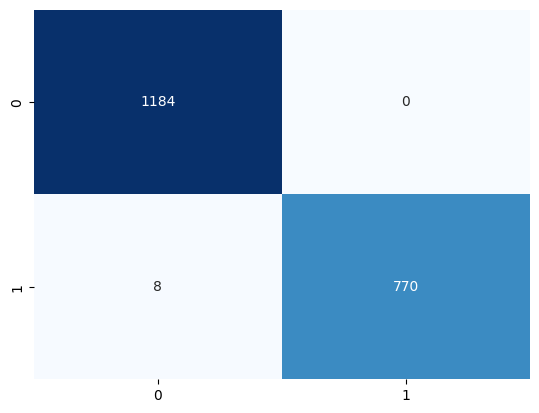

In [ ]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

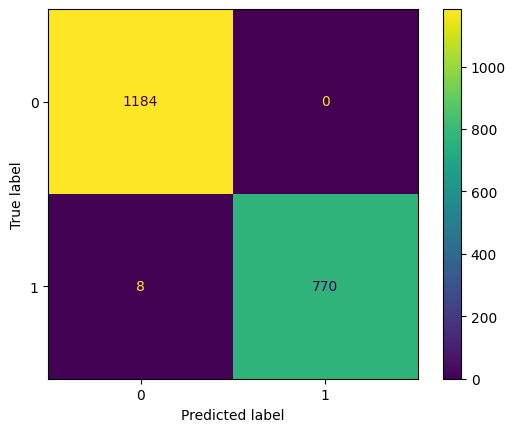

In [ ]:
labels = [0,1]
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=labels)
disp.plot();

Multi-class labels are converted to binary format using **LabelBinarizer()** for further analysis.

In [ ]:
# Convert multi-class labels to binary
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

A Precision-Recall Curve is plotted to illustrate the trade-off between precision and recall, crucial for understanding model performance across different thresholds.

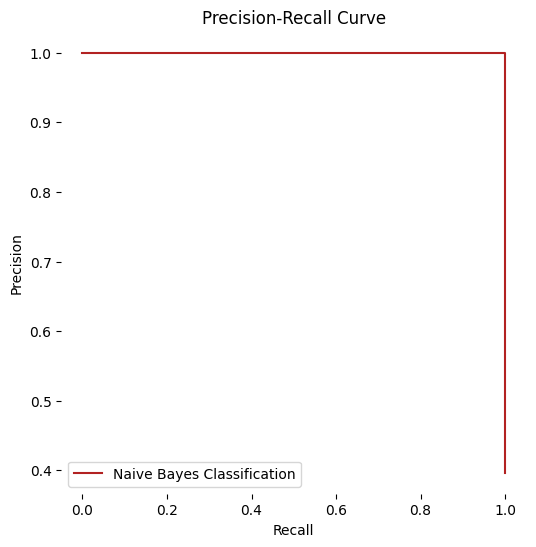

In [ ]:
# Plot Precision-Recall Curve
y_pred_proba = classifier.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test_bin, y_pred_proba)

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(recall, precision, label='Naive Bayes Classification', color='firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box(False)
ax.legend();

An AUC/ROC Curve is plotted to visualize the trade-off between the false positive rate and true positive rate, providing insights into the classifier's discriminatory ability.

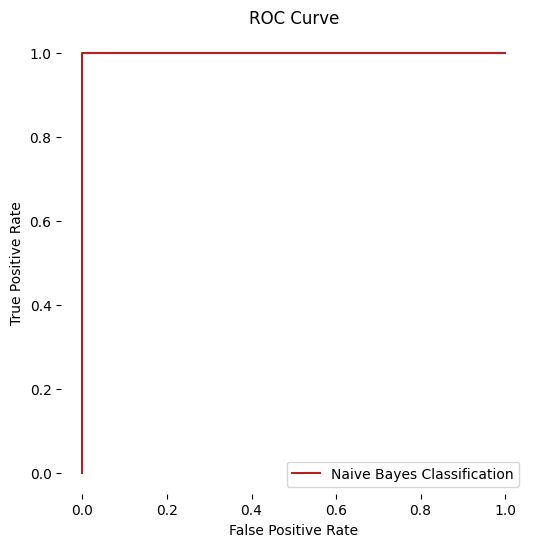

In [ ]:
# Plot AUC/ROC curve
y_pred_proba = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test_bin, y_pred_proba)

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(fpr, tpr, label='Naive Bayes Classification', color='firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

Then, we creates a distribution plot for the 'tcp_urg_packet' column using **Seaborn**.

<ipython-input-21-daa039fa8199>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tcp_urg_packet'])


<Axes: xlabel='tcp_urg_packet', ylabel='Density'>

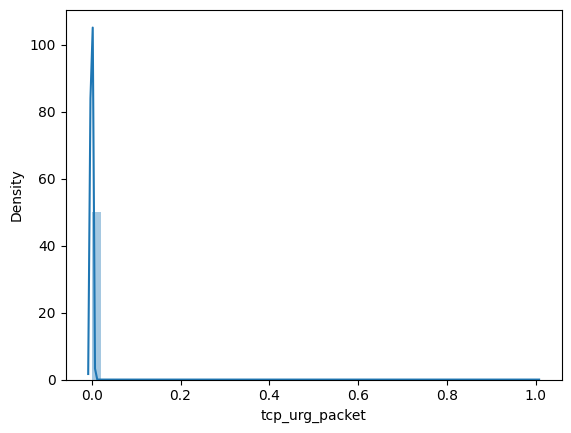

In [ ]:
# Volume distribution
sns.distplot(df['tcp_urg_packet'])

The correlation matrix is computed using **corr()**, and a heatmap is plotted using **seaborn** to visualize the correlation between different features.

<ipython-input-22-f759a636d656>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-22-f759a636d656>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

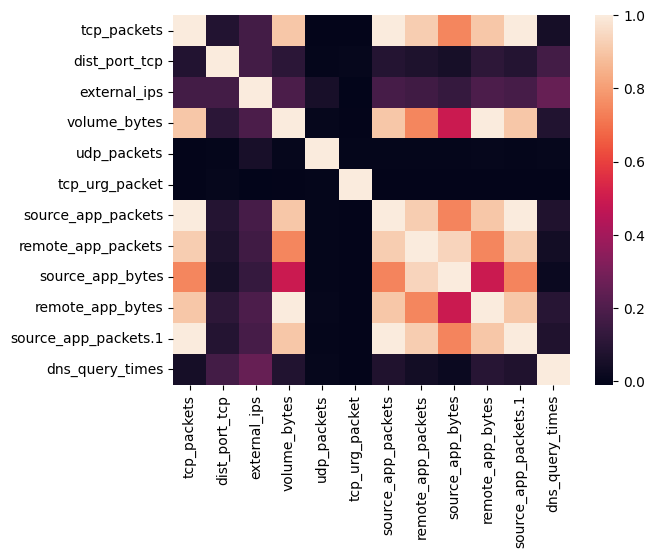

In [ ]:
# Correlation matrix
df.corr()
sns.heatmap(df.corr())